# ***Global_Terrorism_Trend_Analysis***

##**Exploring Global Terrorism Trends: A Geospatial Analysis**
###**Introduction**:  

According to a recent survey, the world faces a dual challenge - natural and man-made calamities. Each year, an astonishing 218 million people are affected by these calamities, resulting in the tragic loss of approximately 68,000 lives. While the frequency of natural disasters such as earthquakes and volcanoes has remained relatively constant, a concerning trend emerges on the global stage - the steady growth in the number of terrorist activities over the years.

###**Project Goals:**

The primary aim of this notebook is to delve into the intricate world of global terrorism. Through the use of interactive plots and animations, we aim to make the exploration of this complex issue both accessible and informative. This project serves as a platform to analyze and understand the evolving landscape of terrorism worldwide.

The aim of this analysis is to provide answers to the following questions:

1. How has the number of terrorist activities changed over the years?
2. Are there certain regions where this trend is different from the global averages?
3. How often the attack becomes a success?
4. What are the most common methods of attacks? Does it differ in various regions or in time?

###**About the dataset**

The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

###**Explanation of selected columns:**

success - Success of a terrorist strike  
suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident - was a suicide  
attacktype1 - The general method of attack  
attacktype1_txt - The general method of attack and broad class of tactics used.  
targtype1_txt - The general type of target/victim  
targsubtype1_txt - The more specific target category  
target1 - The specific person, building, installation that was targeted and/or victimized  
natlty1_txt - The nationality of the target that was attacked  
gname - The name of the group that carried out the attack  
gsubname - Additional details about group that carried out the attack like fractions  
nperps - The total number of terrorists participating in the incident  
weaptype1_txt - General type of weapon used in the incident  
weapsubtype1_txt - More specific value for most of the Weapon Types  
nkill - The number of total confirmed fatalities for the incident  
nkillus - The number of U.S. citizens who died as a result of the incident

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading Data**

In [129]:
Data= pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

<ipython-input-129-a4f2472282ec>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  Data= pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")


In [130]:
Data.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
16872,198208210001,1982,8,21,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
35631,198809120001,1988,9,12,NaN,0,NaN,11,Argentina,3,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
92125,200905300010,2009,5,30,NaN,0,NaN,95,Iraq,10,...,NaN,"Reuters, ""Sticky Bomb Targets Truck Driver,"" h...","National Counterterrorism Center, ""One Civilia...",NaN,ISVG,0,0,0,0,NaN
10187,198002080006,1980,2,8,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
93297,200908200043,2009,8,20,NaN,0,NaN,95,Iraq,10,...,NaN,"McClatchy Newspapers, ""Round-up of Daily Viole...","Associated Press Worldstream, ""Iraq: Two Kille...","National Counterterrorism Center, ""Two People ...",ISVG,-9,-9,0,-9,NaN


**Checking Columns Name**

In [131]:
Data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


**Renaming Columns**

In [132]:
Data.rename(columns={'eventid':'Event_id','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

**Checking the Dimension**

In [133]:
Data.shape

(181691, 135)

In [134]:
# As we have many columns, we take the columns that are necessary for analysis
Data = Data[['Event_id','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [135]:
Data.sample(5)

,Event_id,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
154660,201510250079,2015,10,25,Philippines,Southeast Asia,Maguindanao,Linantangan,6.930046,124.487183,Bombing/Explosion,0.0,3.0,34th Infantry Brigade Soldiers: Corporal Panal...,10/25/2015: Assailants fired a grenade at a mi...,Bangsamoro Islamic Freedom Movement (BIFM),Military,Explosives,NaN,1
120839,201309020017,2013,9,2,Syria,Middle East & North Africa,Aleppo,Sejou,36.212859,37.158951,Hostage Taking (Kidnapping),1.0,0.0,Doctor: Mohamed Abyad,09/02/2013: Assailants abducted Mohamed Abyad ...,Islamic State of Iraq and the Levant (ISIL),NGO,Unknown,NaN,1
67453,199712270002,1997,12,27,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,Assassination,1.0,NaN,former member Seamus Dillon,NaN,Loyalist Volunteer Forces (LVF),Terrorists/Non-State Militia,Unknown,NaN,1
54017,199211140003,1992,11,14,South Africa,Sub-Saharan Africa,Gauteng,Pretoria,-25.748281,28.212069,Bombing/Explosion,0.0,1.0,Bloed Street,NaN,Boer Republikeinse Leer,Private Citizens & Property,Explosives,NaN,1
4924,197706200007,1977,6,20,Italy,Western Europe,Lombardy,Milan,45.469212,9.174508,Armed Assault,NaN,NaN,Sit - Siemens,NaN,Prima Linea,Business,Firearms,NaN,1


In [136]:
Data.shape

(181691, 20)

In [137]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Event_id     181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   state        181270 non-null  object 
 7   city         181256 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181053 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

**Checking Null Values**

In [138]:
Data.isnull().sum()

Event_id            0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
dtype: int64

In [ ]:
Data.describe()

,Event_id,Year,Month,Day,latitude,longitude,Killed,Wounded,success
count,1.304970e+05,130497.000000,130497.000000,130497.000000,126233.000000,1.262320e+05,123128.000000,119163.000000,130496.000000
mean,1.997674e+11,1997.608581,6.370438,15.374936,22.402566,-6.639687e+02,2.250577,3.239051,0.910978
std,1.242996e+09,12.430994,3.424497,8.818001,20.154164,2.425781e+05,10.602436,41.551419,0.284776
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.987111e+11,1987.000000,3.000000,8.000000,8.757816,-6.656108e+00,0.000000,0.000000,1.000000
50%,1.997042e+11,1997.000000,6.000000,15.000000,30.445122,3.548608e+01,0.000000,0.000000,1.000000
75%,2.010083e+11,2010.000000,9.000000,23.000000,35.181446,6.819212e+01,2.000000,2.000000,1.000000
max,2.014042e+11,2014.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,1.000000


In [ ]:
sns.set_style("darkgrid")


## **Terrorist Activities Each Year**

In [ ]:
year_attacks = Data.groupby('Year').size().reset_index(name='count')

Text(0, 0.5, 'Attacks')

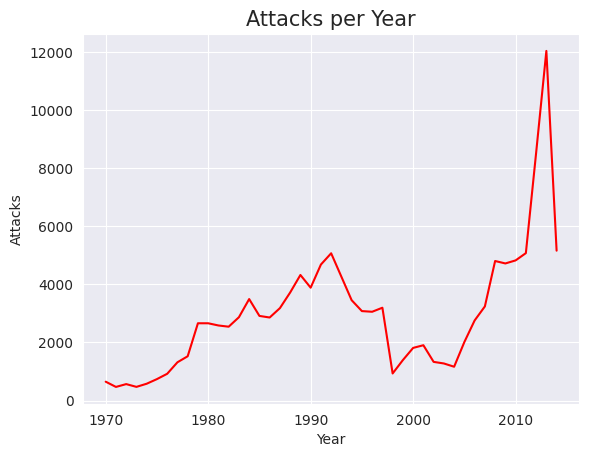

In [ ]:
sns.lineplot(data=year_attacks,x='Year',y='count',color='r')
plt.title('Attacks per Year',fontsize=15)
plt.xlabel('Year')
plt.ylabel('Attacks')

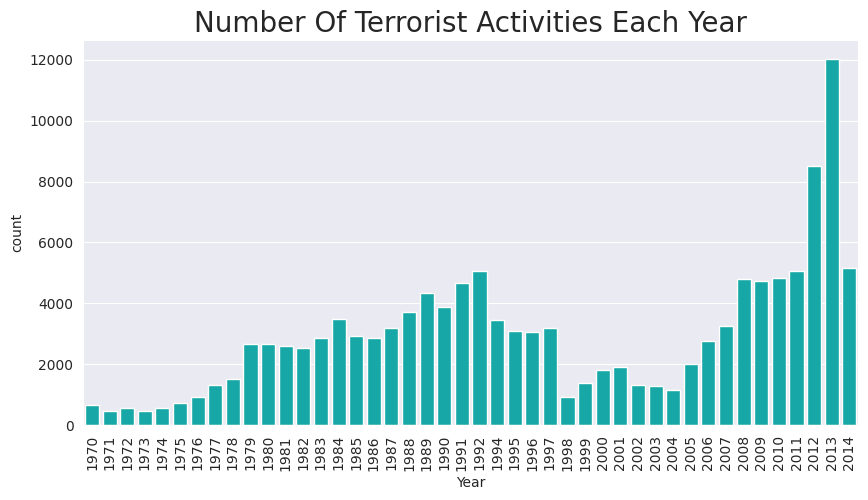

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=Data, x='Year', color='c')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year',fontsize=20)
plt.show()

*There has been a steady increase in global terrorist activities year by year. However, the year 2014 stands out as the peak with the highest recorded incidents. Encouragingly, there has been a subsequent decline in terrorist activity post-2014, offering hope for improved global security efforts.*

## **Terrorist Attack trend Region wise**

In [ ]:
region_attacks=Data.groupby(['Region','Year']).size().reset_index(name='count')

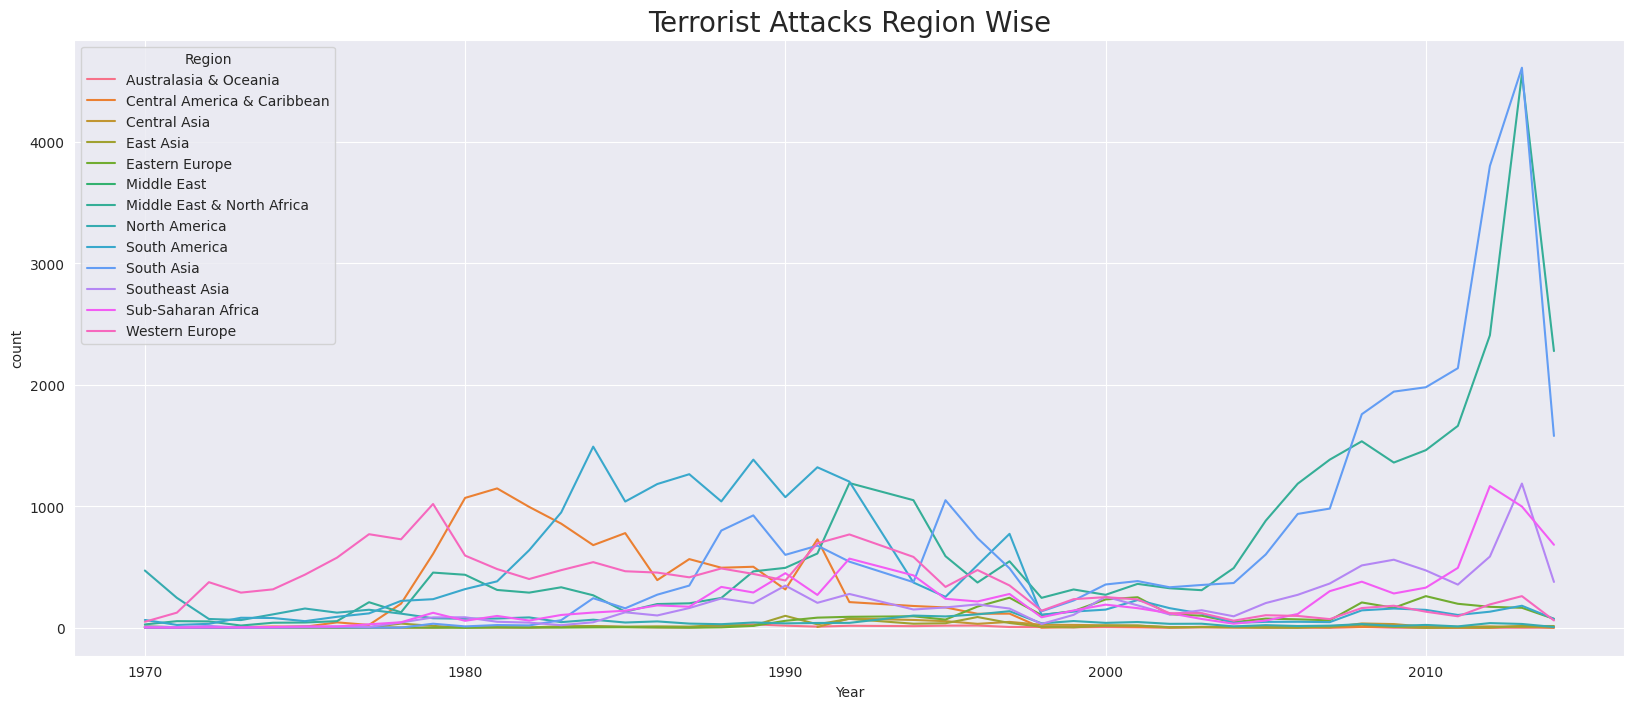

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Year',y='count',data=region_attacks,hue='Region')
plt.title('Terrorist Attacks Region Wise',fontsize=20)
plt.show()

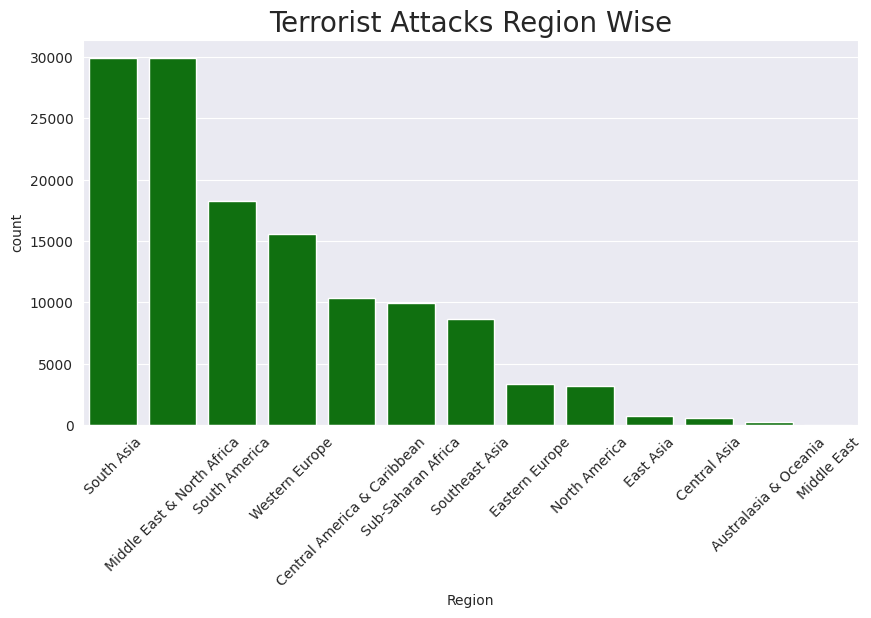

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Region',order=Data['Region'].value_counts().index,data=Data,color='g')
plt.title('Terrorist Attacks Region Wise',fontsize=20)
plt.xticks(rotation=45)
plt.show()

*Terrorism in the Middle East has experienced repeated increases year after year, largely due to ongoing geopolitical conflicts and the presence of extremist groups. South Asia has also witnessed a rise in terrorism, often linked to criminal organizations and drug trafficking. In contrast, Central Asia has comparatively lower terrorism rates*

# **Count of Attack Type**

In [ ]:
attack_count=Data['AttackType'].value_counts()
attack_count

AttackType
Bombing/Explosion                      62463
Armed Assault                          31374
Assassination                          16164
Facility/Infrastructure Attack          7688
Hostage Taking (Kidnapping)             6864
Unknown                                 4013
Hostage Taking (Barricade Incident)      737
Unarmed Assault                          707
Hijacking                                486
Name: count, dtype: int64

<ipython-input-107-18f12e31ccdc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AttackType',data=Data,palette='inferno',order=Data['AttackType'].value_counts().index)


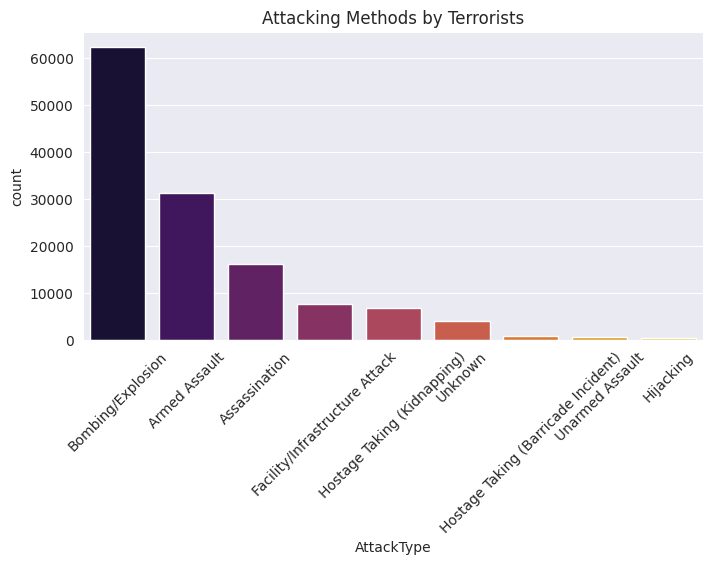

In [ ]:
plt.subplots(figsize=(8,4))
sns.countplot(x='AttackType',data=Data,palette='inferno',order=Data['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Attacking Methods by Terrorists')
plt.show()

# **Top 10 Affected Countries**

Text(0, 0.5, 'Number of Attacks')

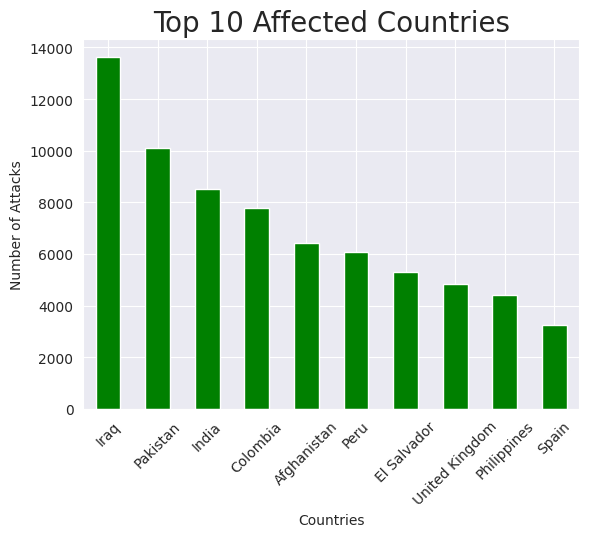

In [ ]:
top_10_countries=Data['Country'].value_counts().sort_values(ascending=False)[:10]
top_10_countries.plot(kind='bar', color='g')
plt.title('Top 10 Affected Countries',fontsize=20)
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Number of Attacks')

The graph highlights five countries most affected by terrorism:

1.   Iraq
2. Pakistan
3. Afghanistan
4. India
5. Colombia

These nations face significant challenges related to terrorism, requiring ongoing efforts to ensure the safety and security of their populations and regional stability.

In [ ]:
Data.columns

Index(['Event_id', 'Year', 'Month', 'Day', 'Country', 'Region', 'state',
       'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive',
       'success'],
      dtype='object')

# **Top Terrorist Group**

Text(0, 0.5, 'Number of Attacks')

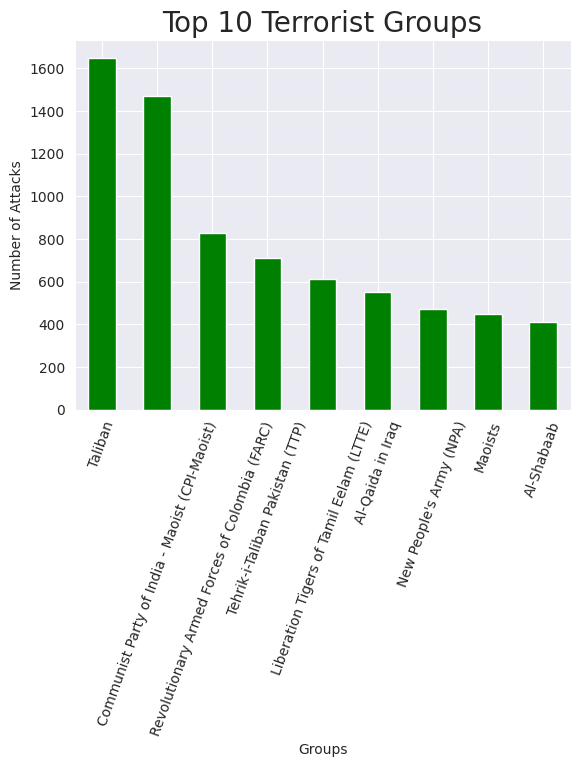

In [ ]:
Top_Group=Data['Group'].value_counts().sort_values(ascending=False)[1:10]
Top_Group.plot(kind='bar', color='g')
plt.title('Top 10 Terrorist Groups',fontsize=20)
plt.xlabel('Groups')
plt.xticks(rotation=70)
plt.ylabel('Number of Attacks')

# **Region Attack By Terrorist**

In [140]:
Region_count=Data['Region'].value_counts()
Region_count

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

Region Attacked
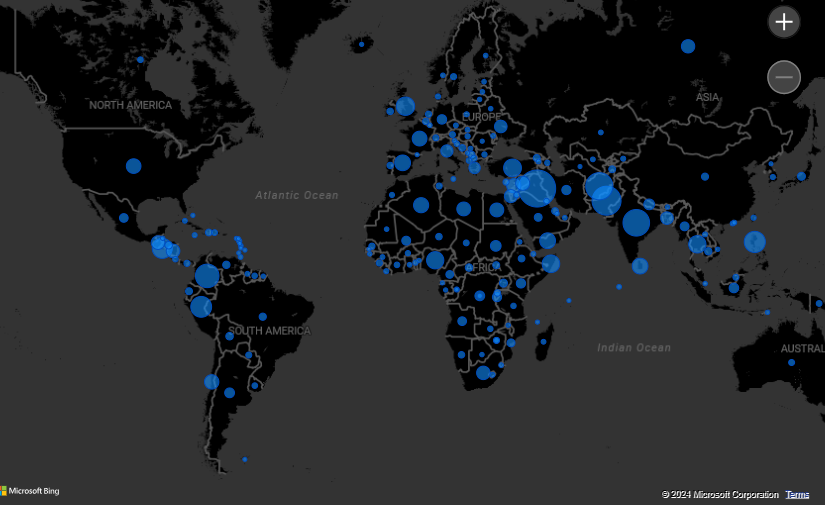

# **People Killed And Wounded Each Year**

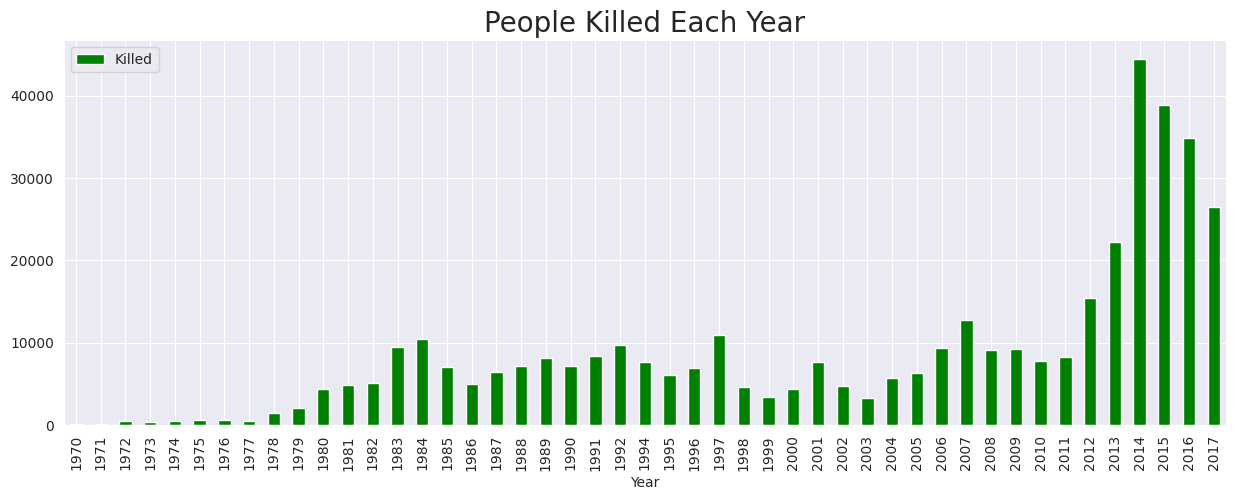

In [142]:
killed_count=Data[["Year","Killed"]].groupby("Year").sum()
killed_count.plot(kind="bar",color='g',figsize=(15,5))
plt.title("People Killed Each Year",fontsize=20)
plt.show()

# **People Killed and Wounded In Each Region**

In [143]:
killed_count_region_wise=Data[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
killed_count_region_wise

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


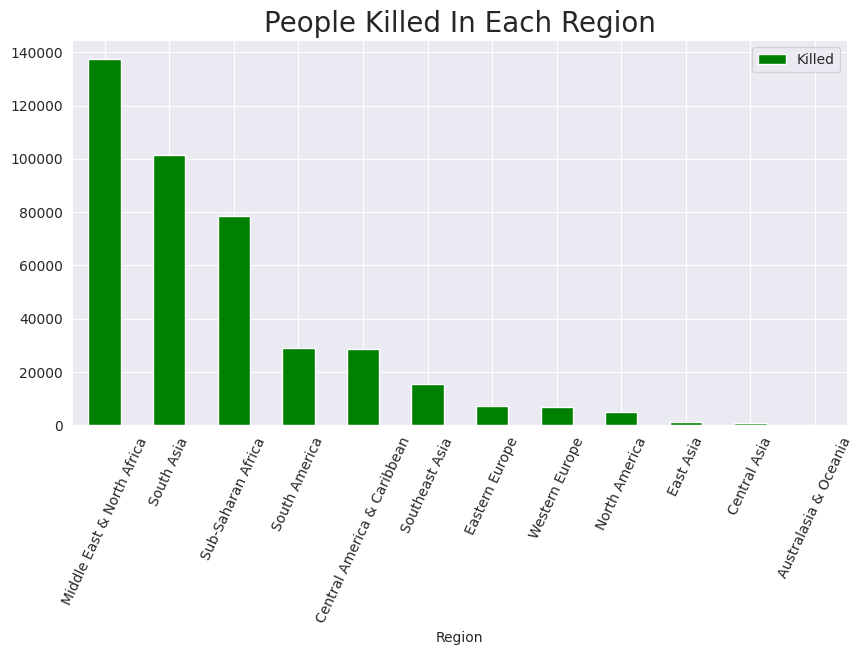

In [147]:
killed_count_region_wise.plot(kind="bar",color='g',figsize=(10,5))
plt.title("People Killed In Each Region",fontsize=20)
plt.xticks(rotation=65)
plt.show()

# **Most Common Weapon type**

In [158]:
weapon_count=Data['Weapon_type'].value_counts()
weapon_count

Weapon_type
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                         

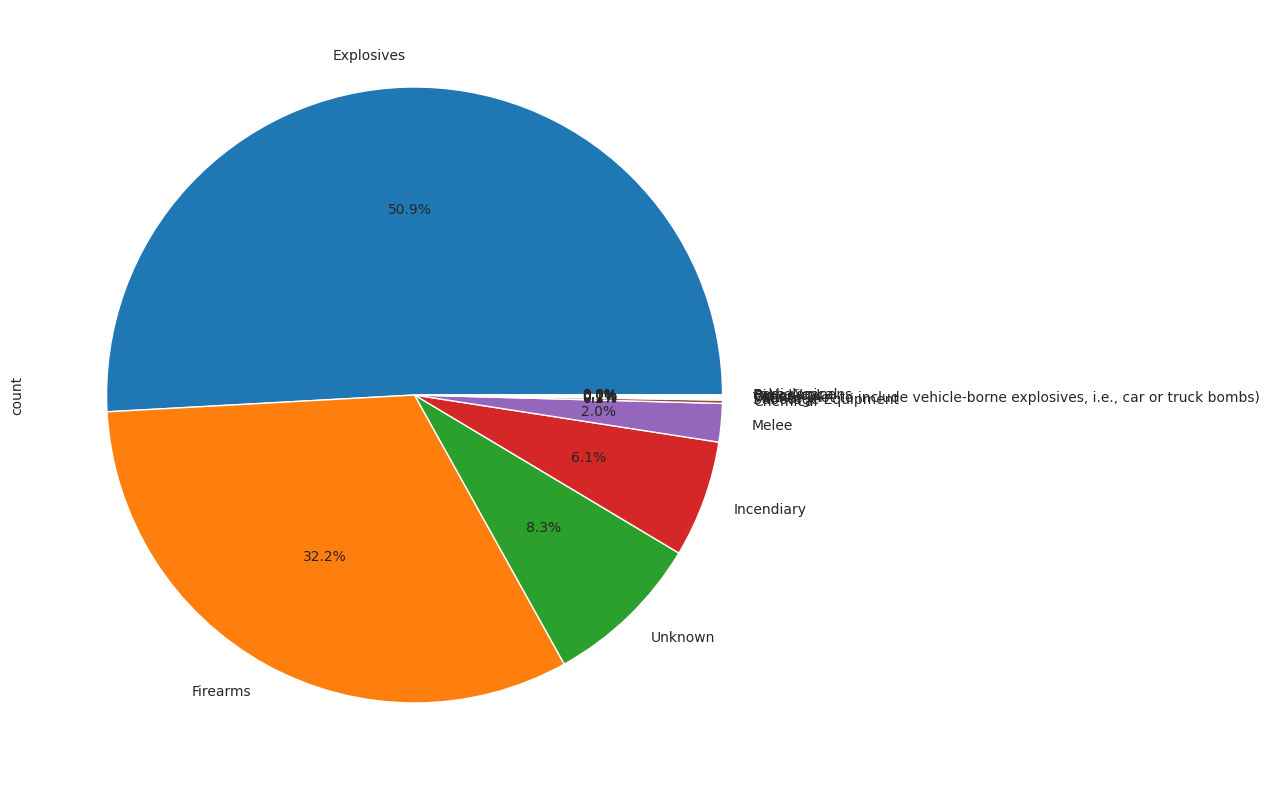

In [159]:
weapon_count.plot(kind='pie',autopct= '%0.1f%%',figsize=(10,10))
plt.show()

# **Terrorist Attacks in India**

In [160]:
India = Data[(Data['Country'] == 'India')]
India.head(5)

,Event_id,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,1
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,1
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,1
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,1
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,1


In [174]:
India_attacks =Data[Data['Country']=='India'].count().sum()
print('There were',India_attacks ,'attacks in India.')

There were 108540 attacks in India.


In [179]:
success_rate=pd.DataFrame(Data['success'].value_counts(normalize=True))
success_rate

,proportion
success,
1,0.913842
0,0.086158


# **Conclusion**
The global landscape is witnessing a concerning rise in the incidence of terrorism attacks, posing a growing threat to peace and security. This unsettling trend is particularly pronounced in two regions: the Middle East and North Africa, as well as South America, where the number of terrorist attacks has surged significantly.

One of the striking aspects of this worrisome phenomenon is the high rate of success achieved by terrorist groups and individuals. Alarmingly, a staggering 89% of these attacks have been successful, resulting in a range of devastating consequences for the affected populations. This success rate underscores the effectiveness and persistence of these malicious actors in carrying out their destructive agendas.

Furthermore, the data reveals that the use of bombings and explosions as tactics in these attacks has inflicted the most casualties. These incidents not only lead to loss of life but also cause severe injuries and widespread damage to property and infrastructure. The prevalence of such tactics highlights the devastating impact of explosive devices and the need for comprehensive efforts to counteract the proliferation and use of explosives on a global scale.

As terrorism continues to pose a significant global challenge, addressing the root causes, enhancing intelligence and security measures, and promoting international cooperation remain crucial in mitigating the impact and working toward a more secure and peaceful world.